In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Scripts import project_functions as func

# Introduction #
Barcelona is a beautiful city in Spain which attracts many tourists yearly. This data analysis explores the **best properties to vacation at in Barcelona, Spain in terms of pricing and customer reviews.** The data being analyzed was retrieved from the Airbnb database for available Airbnbs located in Barcelona only. While conducting the analysis, I specifically wanted to focus on the data that would provide any traveller with the information to choose the best property to stay on while on their trip to Spain. Thus, though the use of bar plots, bar graphs, pair plots, and distribution plots, the data that was analyzed was the customer reviews, the price per propety, and the amount of people that the property can accomodate. 

---

# Task 3: Method Chaining #
*Below is the cleaned and processed dataset.*

In [40]:
df = func.load_and_process('../data/raw/listings.csv')
df.reset_index(drop=True).head()

name  \
0                     Pelayo attic Deluxe H4 - BCN54   
1  Exquisito apartamento con espacios abiertos y luz   
2                         My Address in Barcelona 31   
3              Explore Barcelona from a Stunning Gem   
4           Sagrada Familia Deluxe Apartment - BCN54   

                                         description   host_name  \
0  Fully equipped apartment for 8 people with 2 d...        Juan   
1  Estar en Barcelona. En el centro de Barcelona....         Mar   
2  IMPORTANT INFORMATION:<br />More than ever, cl...  My Address   
3  Fix dinner in a sleek, marble-countered kitche...       Ellie   
4  This fully equipped apartment for 8 people has...        Juan   

   host_response_time host_response_rate                neighbourhood  \
0  within a few hours                89%  Barcelona, Catalunya, Spain   
1      within an hour                90%  Barcelona, Catalunya, Spain   
2  within a few hours                90%  Barcelona, Catalonia, Spain   
3  within a few hours                89%  Barcelona, Catalunya, Spain   
4  within a few hours                89%  Barcelona, Catalonia, Spain   

         room_type  accommodates  \
0  Entire home/apt             8   
1  Entire home/apt             8   
2  Entire home/apt            14   
3  Entire home/apt             8   
4  Entire home/apt             8   

                                           amenities  price has_availability  \
0  ["Elevator", "Kitchen", "Microwave", "Coffee m...  299.0                t   
1  ["Elevator", "Coffee maker", "Dishwasher", "Hi...  299.0                t   
2  ["Kitchen", "Microwave", "Elevator", "Coffee m...  294.0                t   
3  ["Elevator", "Wifi", "Coffee maker", "Room-dar...  288.0                t   
4  ["Elevator", "Kitchen", "Microwave", "Coffee m...  288.0                t   

   review_accuracy  cleanliness  location_review good_property  
0              9.0         10.0             10.0             T  
1             10.0         10.0             10.0             T  
2              9.0          9.0             10.0             T  
3             10.0         10.0             10.0             T  
4              9.0          9.0              9.0             T

## Dataset ##
This dataset shows all of the Airbnb listings in Barcelona, Spain. Specifically, this cleaned and processed dataset shows the most important columns such as the name of the property, the description of the peroperty, the host's name, the host's response time, the host's response rate, the neighbourhood the property is located in, the room type, how many people can be accommodated, the amenities, the price per night, if the property is currently available, the review accuracy, the cleanliness rating of the property, the location review, and if the property is good overall depending on customer reviews and availability. **All of these columns together show the most important information one might consider when booking and Airbnb for vacation** and they will all help in deciding if a property is worth staying at. 

---
# Task 4: EDA #

## Unique Values ##

In [3]:
df.nunique(axis=0)

name                  969
description           946
host_name             168
host_response_time      4
host_response_rate     24
neighbourhood          11
room_type               4
accommodates           13
amenities             904
price                 219
has_availability        2
review_accuracy         9
cleanliness             9
location_review         8
good_property           2
dtype: int64

### Observations: ###
- There are 4 different types of rooms that can be booked in Barcelona
- The most a property can accommodate is 14 people (since there are 13 unique values and 0 is not one of them since you can't have 0 guests).

## Describe ##

In [4]:
df.describe()

accommodates       price  review_accuracy  cleanliness  location_review
count    984.000000  984.000000       984.000000   984.000000       984.000000
mean       4.573171   95.153455         9.268293     9.223577         9.628049
std        1.922383   59.256326         1.010208     0.958346         0.738331
min        1.000000    9.000000         2.000000     2.000000         2.000000
25%        3.000000   50.000000         9.000000     9.000000         9.000000
50%        4.000000   85.000000         9.000000     9.000000        10.000000
75%        6.000000  125.000000        10.000000    10.000000        10.000000
max       14.000000  299.000000        10.000000    10.000000        10.000000

### Observations: ###
- The least expensive property is 9 dollars
- Most properties can accommodate 4 people since that is the mean
- Most properties are very clean and have accurate reviews since the mean for both columns is 9.2/10

## Pair Plot ##

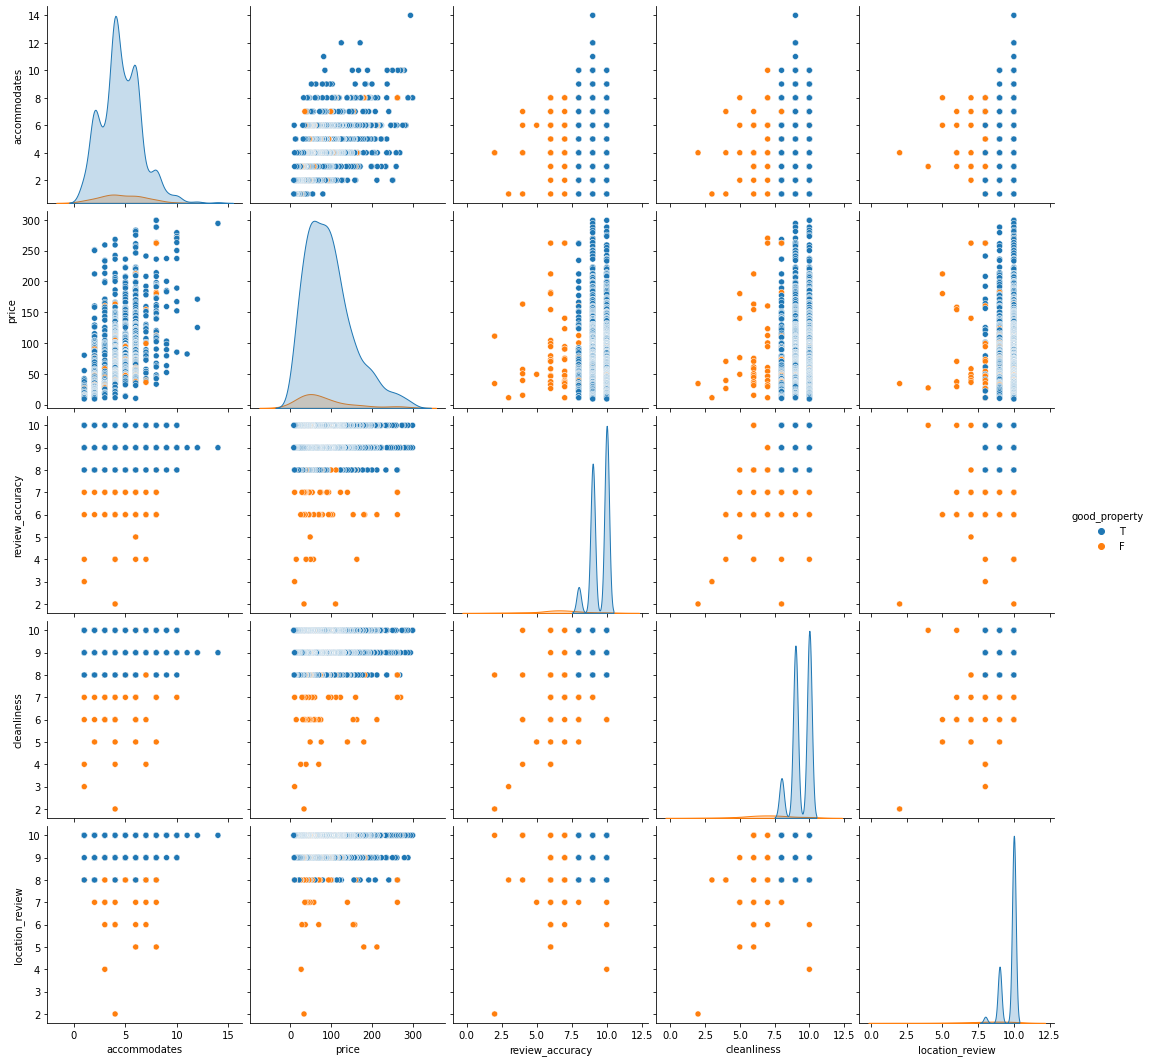

In [42]:
sns.pairplot(df, hue = 'good_property', height = 3)

### Observations: ###
- This shows me that overall, the properties in Barcelona are generally inexpensive, very clean, have good locations, and have accurate reviews
- There are also a lot more good properties than bad ones.

## Distribution Plot ##

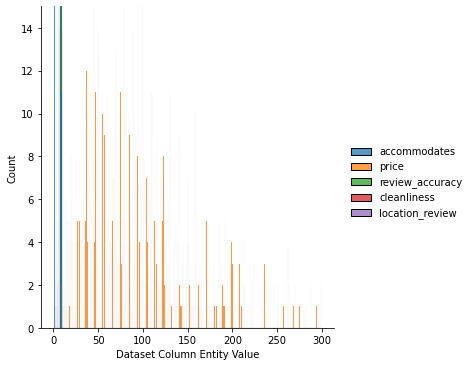

In [17]:
sns.displot(df).set(ylim=(0, 15),xlabel='Dataset Column Entity Value')

### Obervations: ###
- This shows that most properties listed have a very low price. It seems like they mostly range between $9-$125.
- Most properties listed are able to accomodate under 10 people.

## Bar Plot ##

[Text(0.5, 0, '# of People Accommodated'),
 Text(0, 0.5, 'Review Accuracy Score')]

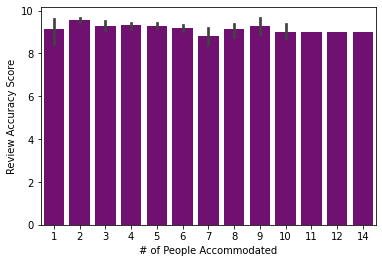

In [25]:
#sns.barplot(x = 'accommodates', y='price', data = df)
sns.barplot(x = 'accommodates', y = 'review_accuracy', data = df, color = 'purple').set(xlabel = '# of People Accommodated', ylabel = 'Review Accuracy Score')

### Observations: ###
- The customer reviews for almost all properties are accurate. This tells me that no matter how many people I travel to Barcelona with, the rviews will be accurate regardless.

## Bar Graph ##

[Text(0.5, 0, 'Location Review'), Text(0, 0.5, 'Count / Score')]

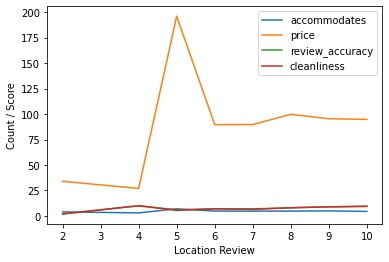

In [30]:
%matplotlib inline
df.groupby('location_review').mean().plot(kind='line').set(xlabel = 'Location Review', ylabel = 'Count / Score')

### Observations: ###
- The average price of property that have a 5.0 location review rating costs the most (almost 2X the amount of the other properties). This is surprising because those properties also have a low cleanliness score in comparison to the properties that have a higher location review rating. Typically, the property that has the highest location review rating and cleanliness rating costs the most, but in this case, it appears it would be the better and cheaper option.
    
- It seems that the properties with a 5.0 location review accommodates the most people thus, those properties would be the most expensive (as discovered in other findings). This means staying in Barcelona with a large group (14 people) would result in a not so good loaction as well as properties that are not so clean. 

---
# Task 5: Analysis #

At the start of this project, I was interested in exploring the best location to stay in Barcelona, with the lowest price and best reviews through my Airbnb dataset. Since beginning the exploration of my dataset, I have since discovered that the dataset contains data for only Barcelona thus, there aren’t numerous neighbourhoods I was able to explore. Because of this, I have changed my research question to excluded finding the best area to stay in Barcelona. Instead, my exploration focused on finding the correlations between property pricing, customer reviews on the properties, and the amount of people that a property can accommodate. This being said, my research question is now: ***what is best price to budget/pay for accommodations in Barcelona that have the best reviews and how many people would that budget cover?***
    
### Pair Plot ###
Firstly, I wanted to know what the correlation between **prices, reviews, and accommodations** looked like across all properties in Barcelona. To do this, I used a pair plot across all relevant columns: 


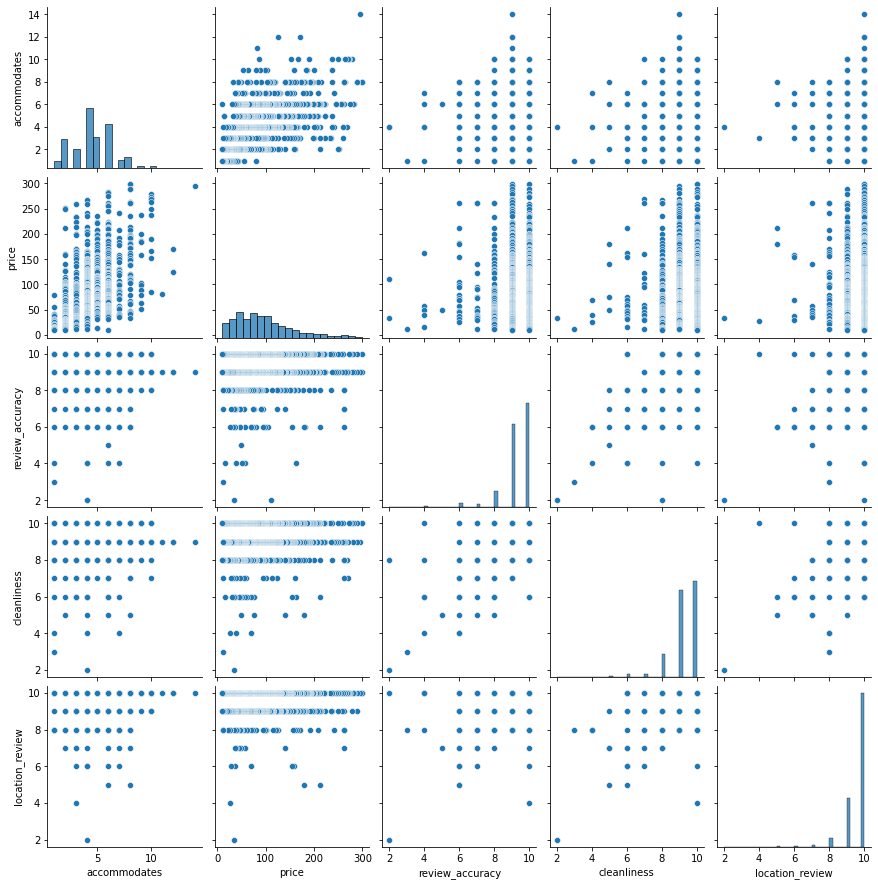

In [9]:
sns.pairplot(df)

In analyzing the pair plot, I observed that the properties in Barcelona are quite inexpensive and it seems that most of the properties have very high review ratings in terms of cleanliness, location, and the accuracy of reviews. Something that is especially interesting about these findings is that it shows that most of the properties have a high location review rating which is exciting because that means there are not many properties that would be unenjoyable. This is a **good sign** because most the properties in Barcelona look like they’re good properties to stay at however, it does not narrow down my research question since I am looking specifically for the best price that should be budgeted for good accommodations in Barcelona. 
    
In order to explore price points for accommodations in Barcelona further, a different type of graph needs to be considered.

### Distribution Plot ###
Since the price of the properties in Barcelona are the main concern of my research with this dataset, I need to use a graph to analyze this directly. Thus, I used a distribution plot in order to analyze the **best price range** to be considered when searching for a property to vacation at in Barcelona:

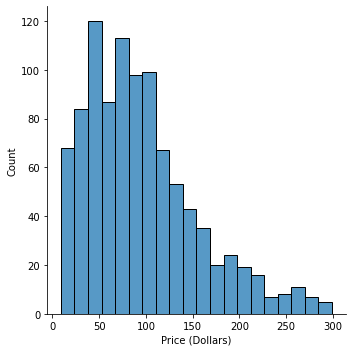

In [32]:
sns.displot(df['price']).set(xlabel = 'Price (Dollars)')

Key observations made from this graph were helpful in understanding more realistic price points for most properties in Barcelona. The graph shows that **most properties range from about nine dollars to about one-hundred and twenty-five dollars.** This graph also shows that most properties are priced at about **forty to fifty dollars** and only a few properties are priced high, over two-hundred dollars. In fact, **it appears there are less and less properties available over one-hundred dollars.** Thus, the price range that should be considered when looking for accommodations in Barcelona is between nine and one-hundred and twenty-five dollars. This information is helpful as now I know what prices should be expected for accommodations in Barcelona. Unfortunately, this graph does not also explain how many people a property within this price range is capable of accommodating. 

For this reason, another visual graph should be used in order to analyze that data specifically.

### Bar Plot ###
Because I now wish to analyze the **relationship between price and accommodations**, I used a bar plot with the y-axis representing the price, and the x-axis representing the number of people that can be accommodated for the corresponding price: 

[Text(0.5, 0, '# of People Accommodated'), Text(0, 0.5, 'Price in Dollars')]

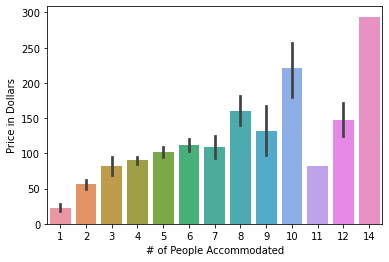

In [33]:
sns.barplot(x = 'accommodates', y='price', data = df).set(xlabel = '# of People Accommodated', ylabel = "Price in Dollars")

This graph shows that the targeted price range discussed in the previous section has the most variety in terms of how many people can be accommodated. Specifically, between one and eleven people (excluding eight and ten people) can be accommodated for the low-price range previously discussed. This price range also shows that **the most expensive properties accommodate the maximum number of people**, fourteen. This is useful insight for answering my research question as it illustrates that the properties priced between nine and one-hundred and twenty-five dollars can accommodate between one and eleven people (excluding eight and ten people). 

Next, I need to take a look at how the customer reviews correspond to these findings. Particularly, I am searching for how the price correlated to the reviews as this will tell me the best way to filter my Airbnb search when booking the accommodations in Barcelona.

### Bar Graph ###
In order to look at the relationship between the **price of the properties and the customer reviews**, I plotted a bar graph. This shows each category in different colours which clearly show the distinction and count of each category from the dataset: 

[Text(0, 0.5, 'Count / Score / Price in Dollars'),
 Text(0.5, 0, 'Location Review')]

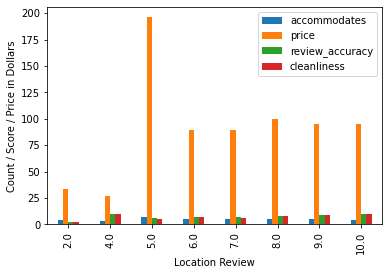

In [34]:
%matplotlib inline
df.groupby('location_review').mean().plot(kind='bar').set(ylabel = 'Count / Score / Price in Dollars', xlabel = 'Location Review')

This graph shows that the properties with a location review rating of 6.0 or higher full in my specified price range and have good overall ratings from the customer reviews. This graph also shows that the price of the properties with a location review rating of 5.0 is priced the highest, almost two-hundred dollars. Relating this back to the previous graph I observed, it appears this is because these properties accommodate the maximum number of people, fourteen. However, these properties do not have the best location, and are not the cleanest as per the customer reviews. Thus, the greatest take away from this graph is that **the properties in my specified price range accommodate between one and eleven people (excluding eight and ten people), and have amazing cleanliness and review accuracy review ratings.**

## Conclusion ##
Thus, to answer my research question, the best price range to consider while looking for accommodations in Barcelona is between **nine and one-hundred and twenty-five dollars** as this will accommodate about one to eleven people (excluding eight and ten people). Budgeting for this price range will also allow for a property with a very good cleanliness rating as per the customer reviews.